# ***Importing libraries***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings('ignore')

sns.set()

In [2]:
df = pd.read_csv('IRIS.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


***EDA***

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

sepal_length : 




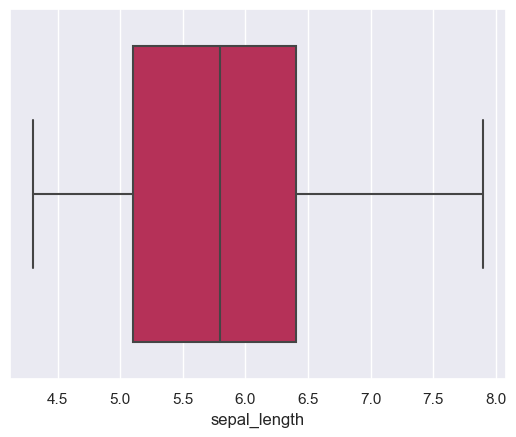

sepal_width : 




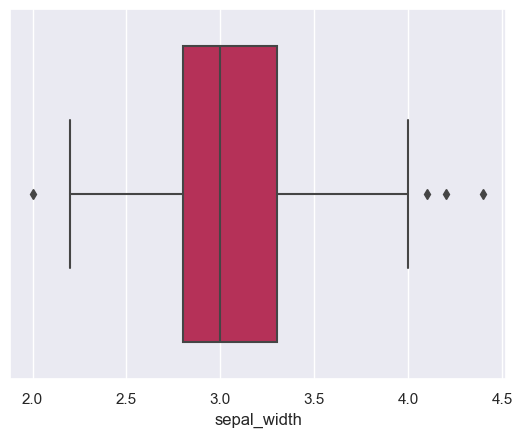

petal_length : 




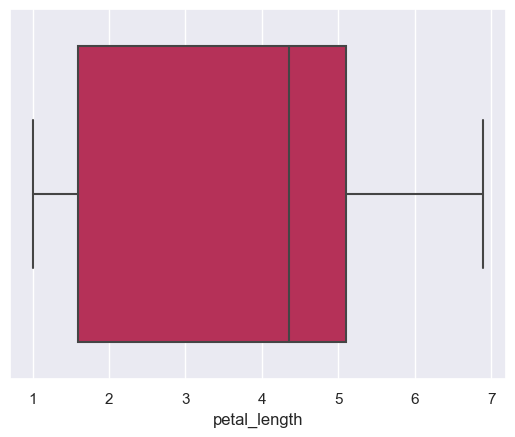

petal_width : 




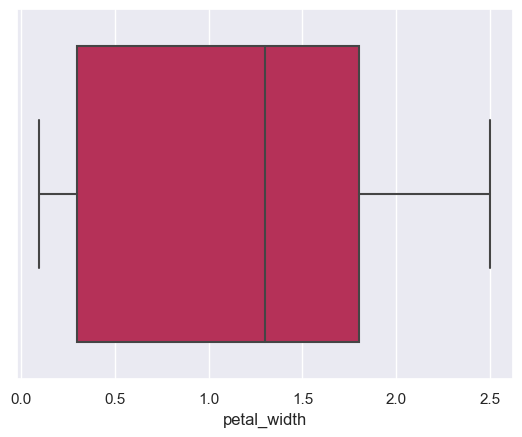

In [6]:
for col in df.select_dtypes(include=['float64']):
    print(f'{col} : ')
    sns.boxplot(data = df , x =col , palette='rocket')
    print('\n')
    plt.show()

In [7]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

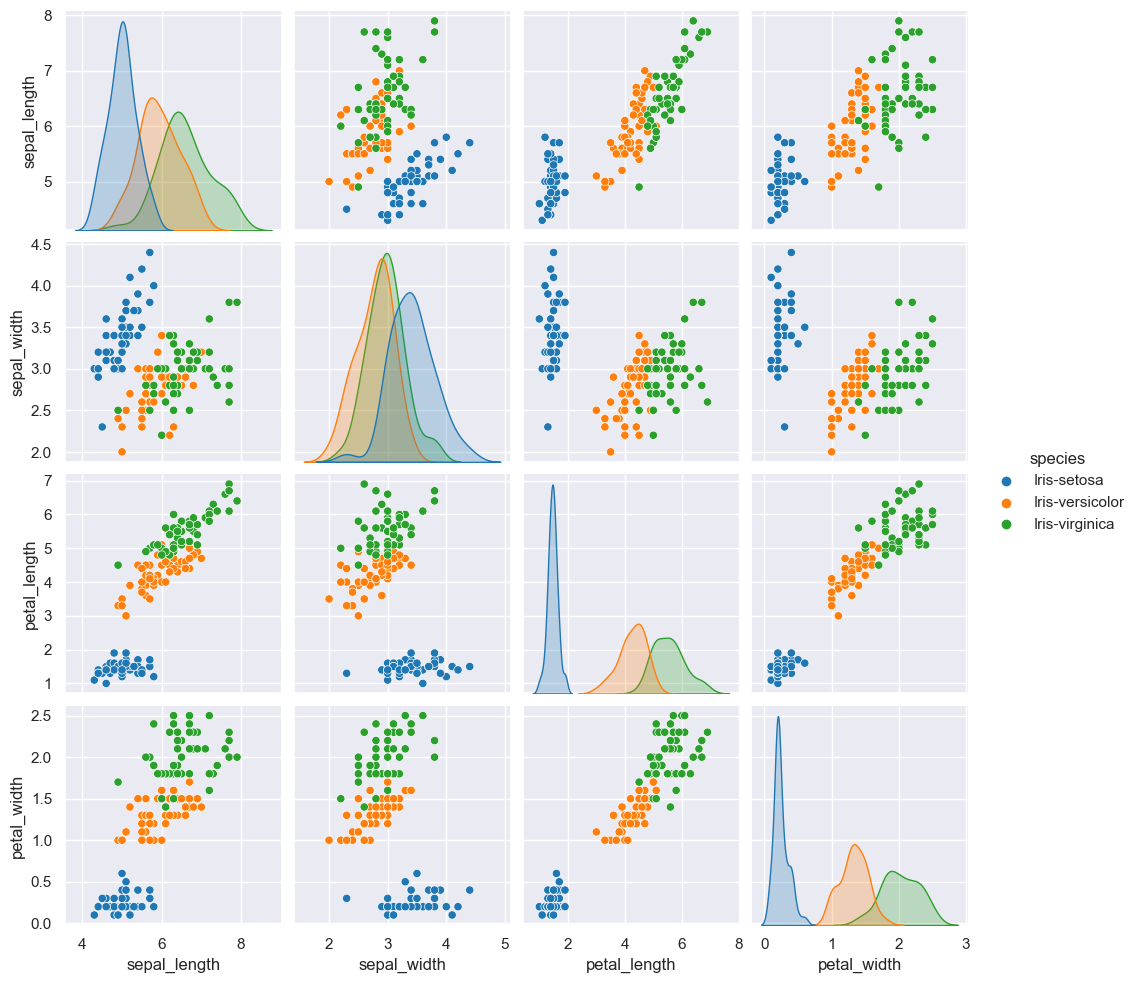

In [8]:
sns.pairplot(df,hue="species" , palette='tab10')

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])

In [10]:
df['species'].value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

<Axes: >

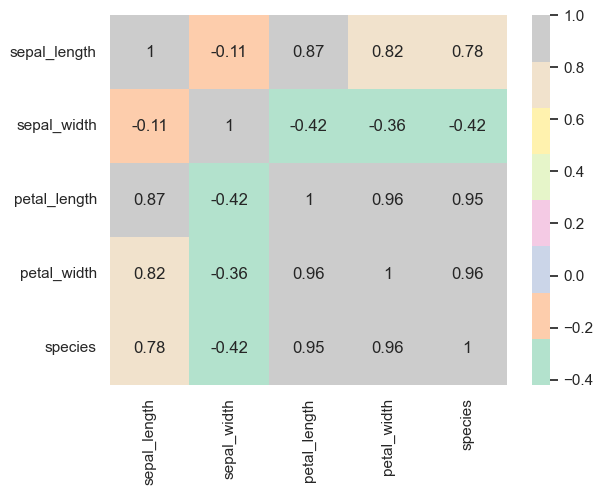

In [69]:
sns.heatmap(df.corr() , annot=True , cmap='Pastel2')

In [32]:
from sklearn.model_selection import train_test_split
x =df.drop('species',axis =1)
y =df['species']
x_train , x_test ,y_train ,y_test = train_test_split(x,y ,test_size=0.3 , random_state=9)

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

***Models***

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report , confusion_matrix,ConfusionMatrixDisplay,roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_validate, cross_val_predict, cross_val_score

In [35]:
def plot_roc_curve(y_true, y_prob, classes):
    n_classes = len(classes)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true == i, y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(8, 6))
    colors = ['blue', 'red', 'green', 'orange']  
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(classes[i], roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve for Multiclass')
    plt.legend(loc="lower right")
    plt.show()

GBC
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Accuracy = 1.0
Confusion Matrix:
[[18  0  0]
 [ 0 14  0]
 [ 0  0 13]]


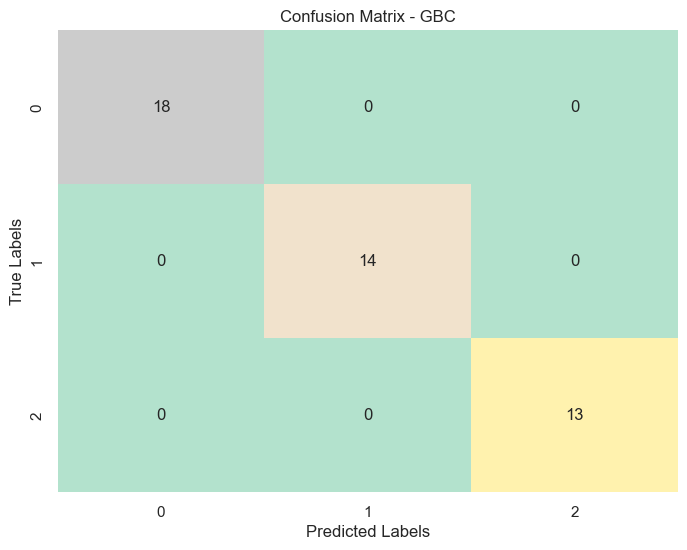

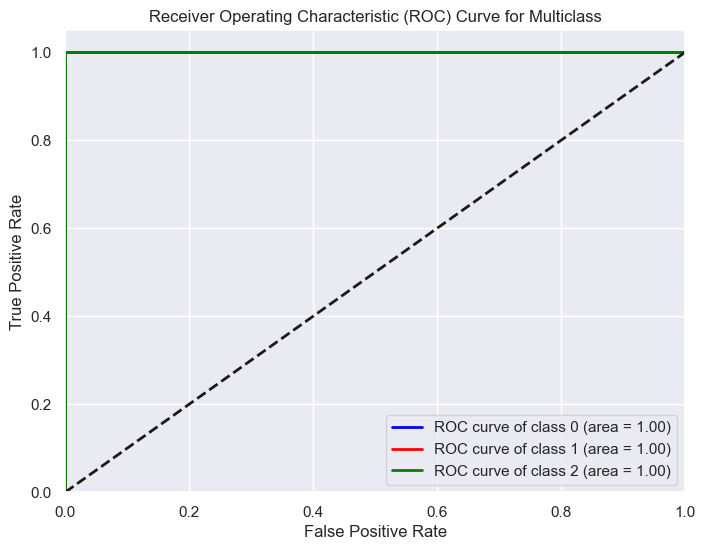

--------------------------------------------------------------------------------
Cat
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Accuracy = 1.0
Confusion Matrix:
[[18  0  0]
 [ 0 14  0]
 [ 0  0 13]]


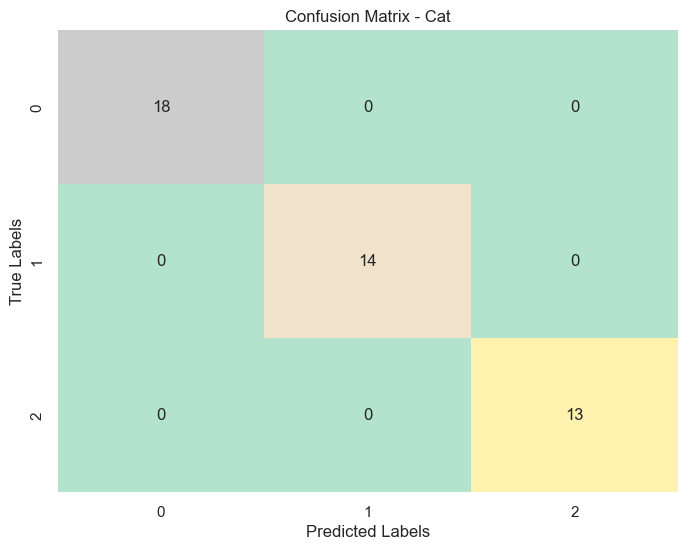

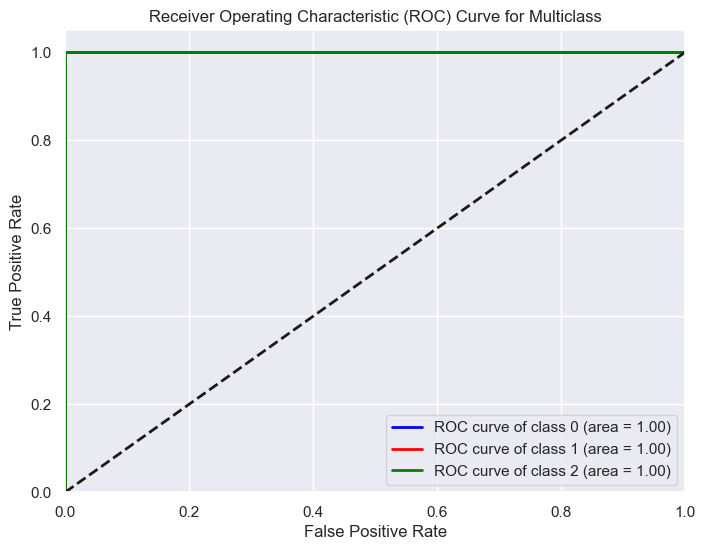

--------------------------------------------------------------------------------
Random Forest
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.93      1.00      0.97        14
           2       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45

Accuracy = 0.9777777777777777
Confusion Matrix:
[[18  0  0]
 [ 0 14  0]
 [ 0  1 12]]


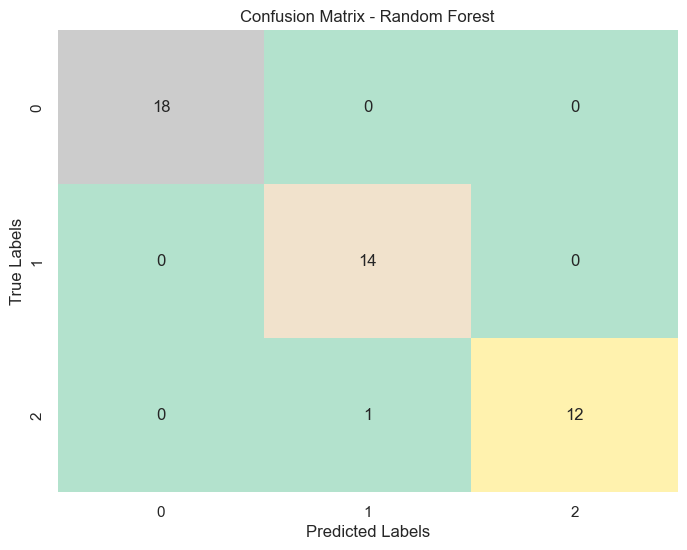

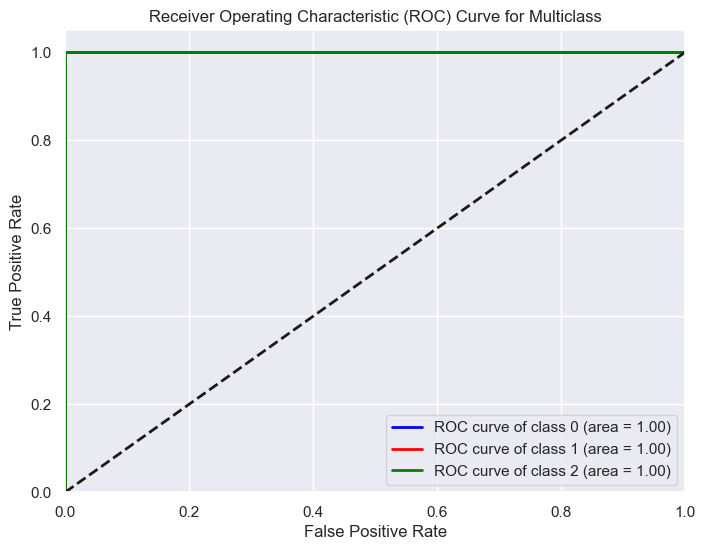

--------------------------------------------------------------------------------
XGB
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       0.93      0.93      0.93        14
           2       1.00      0.92      0.96        13

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45

Accuracy = 0.9555555555555556
Confusion Matrix:
[[18  0  0]
 [ 1 13  0]
 [ 0  1 12]]


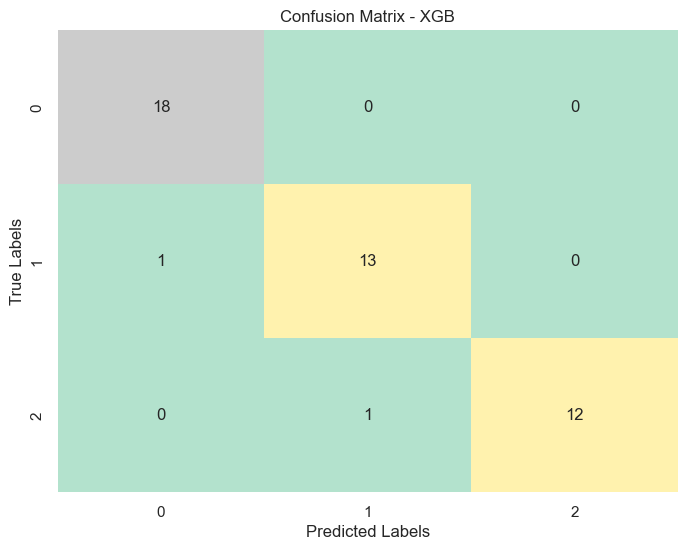

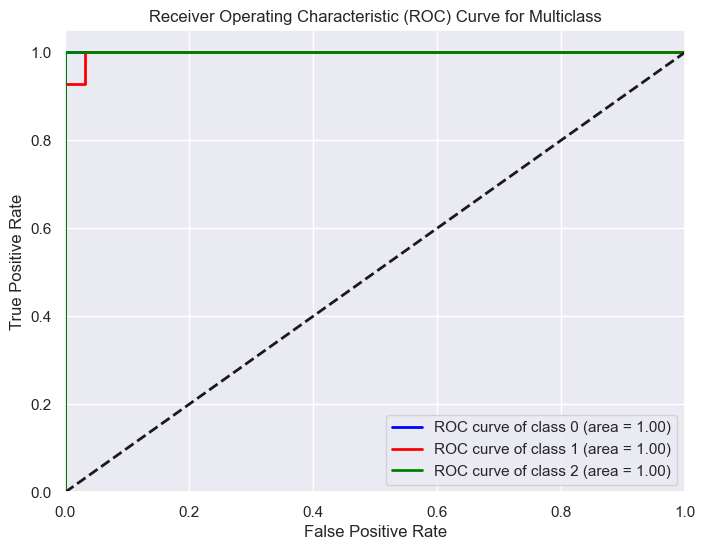

--------------------------------------------------------------------------------
LRG
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Accuracy = 1.0
Confusion Matrix:
[[18  0  0]
 [ 0 14  0]
 [ 0  0 13]]


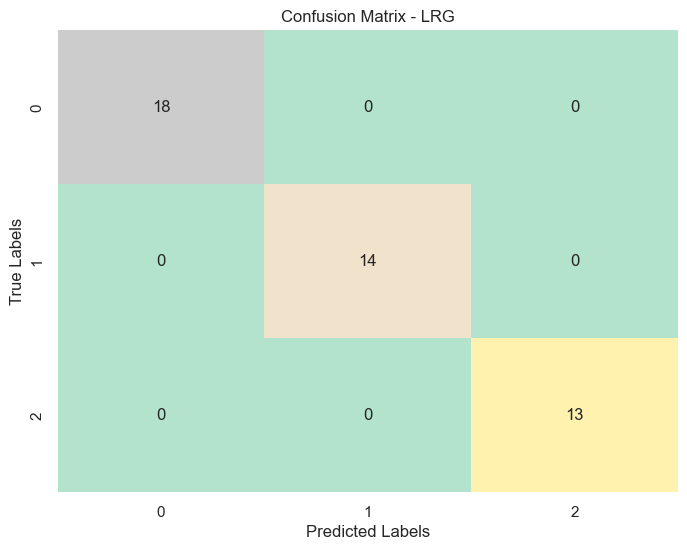

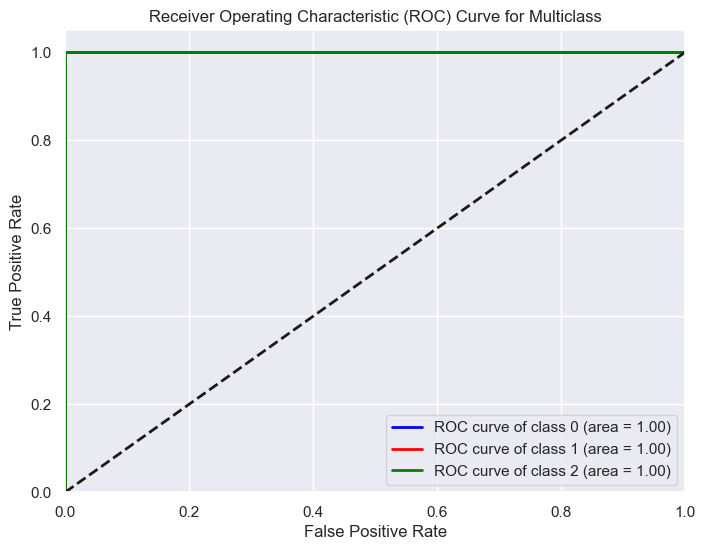

--------------------------------------------------------------------------------
DTC
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.93      1.00      0.97        14
           2       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45

Accuracy = 0.9777777777777777
Confusion Matrix:
[[18  0  0]
 [ 0 14  0]
 [ 0  1 12]]


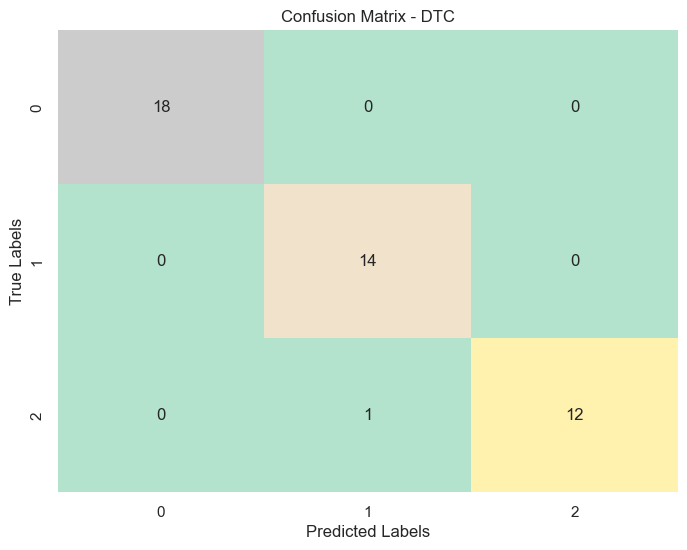

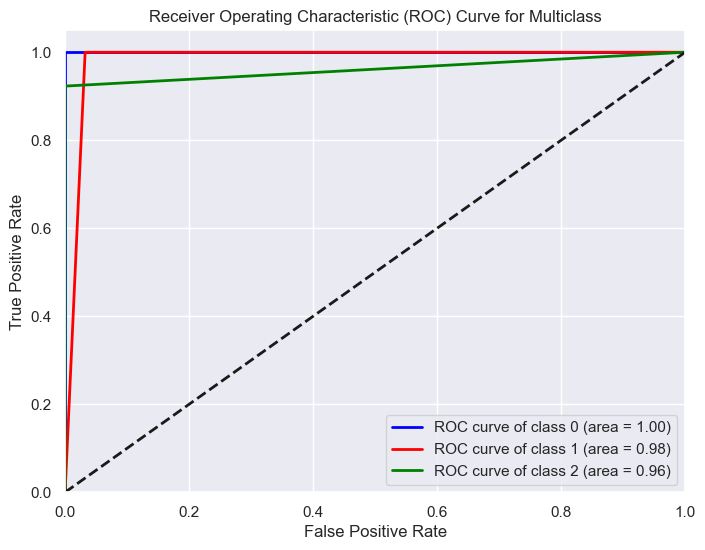

--------------------------------------------------------------------------------
KNN
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Accuracy = 1.0
Confusion Matrix:
[[18  0  0]
 [ 0 14  0]
 [ 0  0 13]]


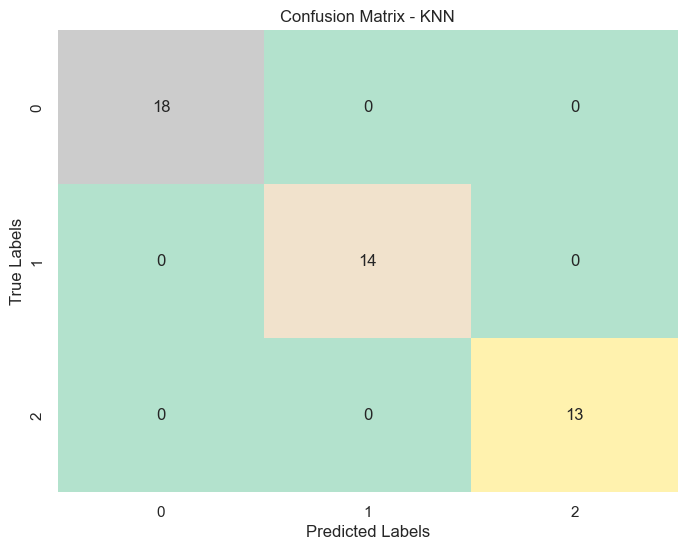

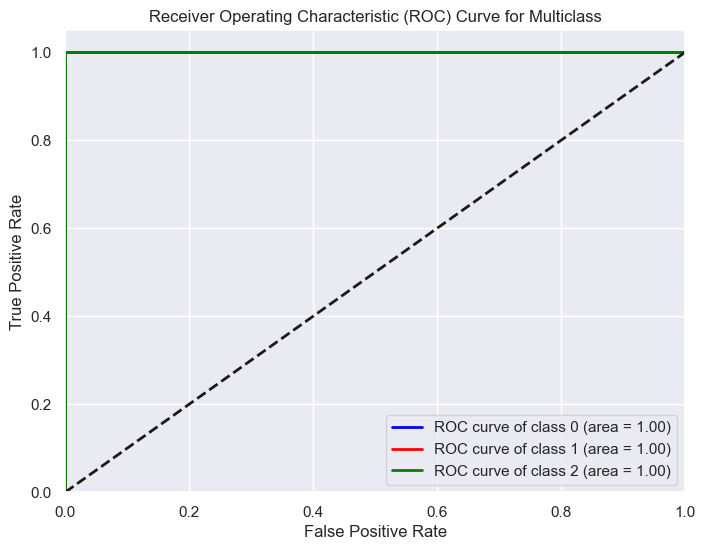

--------------------------------------------------------------------------------
MLPC
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Accuracy = 1.0
Confusion Matrix:
[[18  0  0]
 [ 0 14  0]
 [ 0  0 13]]


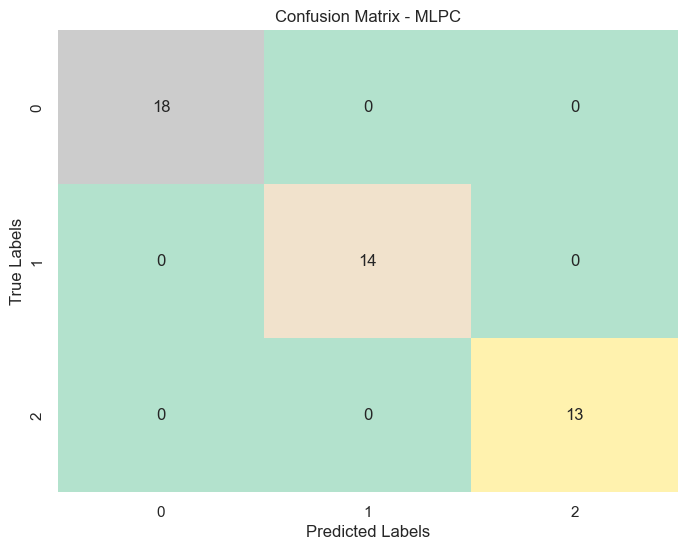

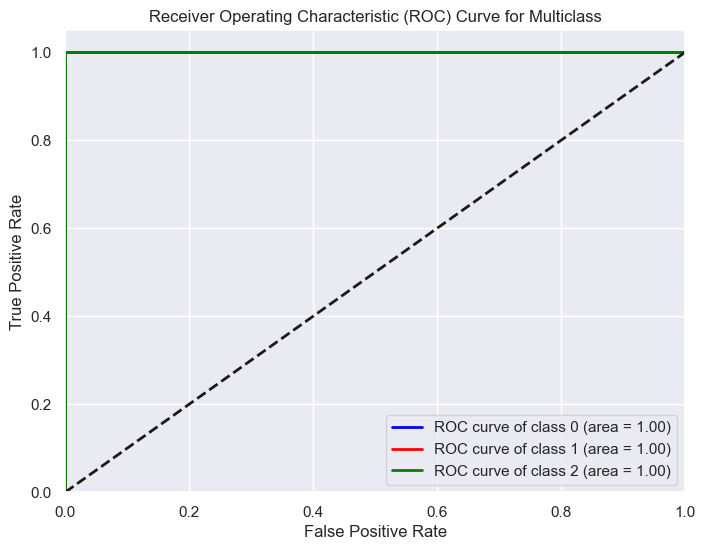

--------------------------------------------------------------------------------
ABC
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Accuracy = 1.0
Confusion Matrix:
[[18  0  0]
 [ 0 14  0]
 [ 0  0 13]]


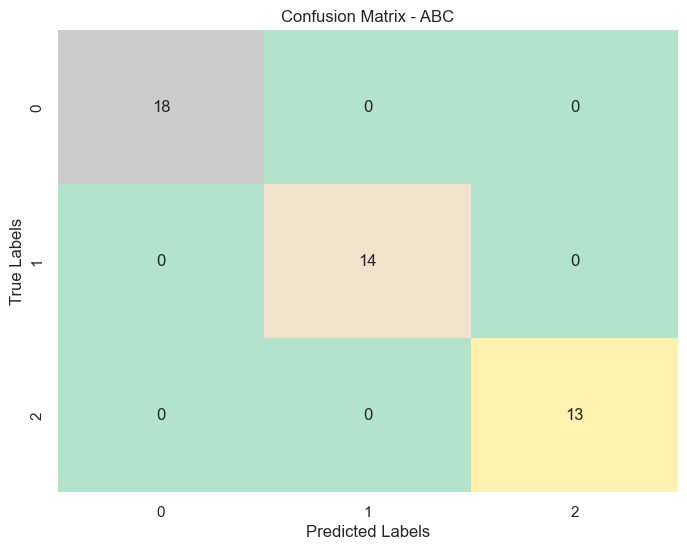

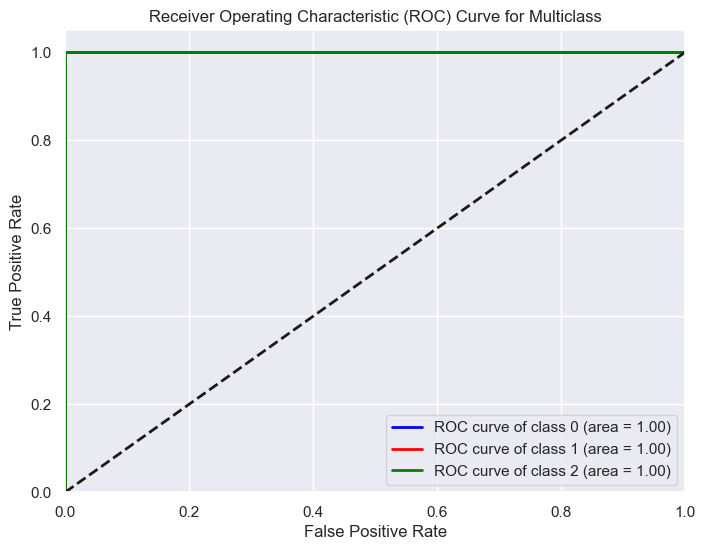

--------------------------------------------------------------------------------
Best model: GradientBoostingClassifier(), Best accuracy: 1.0


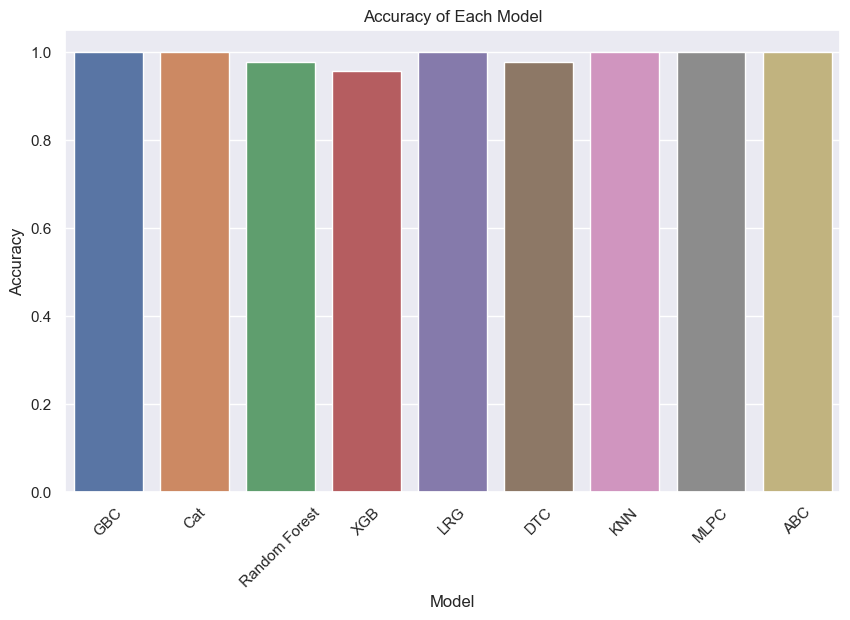

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

models = {
    "GBC": GradientBoostingClassifier(),
    'Cat': CatBoostClassifier(verbose=False),
    'Random Forest': RandomForestClassifier(verbose=False),
    'XGB': XGBClassifier(verbosity=0),
    "LRG": LogisticRegression(),
    
    "DTC": DecisionTreeClassifier(),
    
    "KNN": KNeighborsClassifier(),
    "MLPC": MLPClassifier(),
    "ABC": AdaBoostClassifier(),
}

best_model = None
best_accuracy = 0  
accuracies = []

for name, model in models.items():
    print(f"{name}")
    print('-' * 80)
    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(classification_report(y_test, y_pred))
    print("Accuracy =", accuracy) 
    
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Pastel2', cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()
    
    y_prob = model.predict_proba(x_test)
    plot_roc_curve(y_test, y_prob, classes=model.classes_)
    
    print('-' * 80)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

print(f"Best model: {best_model}, Best accuracy: {best_accuracy}")

plt.figure(figsize=(10, 6))
sns.barplot(x=list(models.keys()), y=accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Each Model')
plt.xticks(rotation=45)
plt.show()


In [90]:
model =GradientBoostingClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [89]:
pd.DataFrame({'Actual value' : y_test , 'Predicted_value': y_pred})

,Actual value,Predicted_value
135,2,2
90,1,1
145,2,2
147,2,2
60,1,1
37,0,0
26,0,0
3,0,0
75,1,1
9,0,0
